<img src='https://www.icos-cp.eu/sites/default/files/2017-11/ICOS_CP_logo.png' width=400 align=right>

# ICOS Carbon Portal Python Library
## Example: STILT, create a simple animation

This example shows how to search for STILT stations, load the data and create some simple visualisations and animations.

## Documentation
Full documentation for the library on the [project page](https://icos-carbon-portal.github.io/pylib/), how to install and wheel on [pypi.org](https://pypi.org/project/icoscp/"), source is available on [github](https://github.com/ICOS-Carbon-Portal/pylib)

## Load libraries

In [1]:
from icoscp.stilt import station
import numpy as np
from IPython.display import HTML, display
from matplotlib import pyplot as plt, animation
#%matplotlib inline

## Create STILT station object
Remember, that station get always returns a LIST of stilt stations objects

In [2]:
st = station.get(id='KIT030')
print(st)

  0%|          | 0/170 [00:00<?, ?it/s]

{"id:": "KIT030", "name:": "KIT Karlsruhe 30m", "lat:": 49.09, "lon:": 8.43, "alt [m]:": 30, "country": "Germany"}


## Load footprints
The .get_fp function returns by default an xarray object

In [3]:
start = '2018-01-01'
end = '2018-01-31'

stilt_fp = st.get_fp(start, end)

#View fp xarray:
stilt_fp

<xarray.Dataset>
Dimensions:  (lat: 480, lon: 400, time: 241)
Coordinates:
  * lon      (lon) float64 -14.94 -14.81 -14.69 -14.56 ... 34.69 34.81 34.94
  * lat      (lat) float64 33.04 33.12 33.21 33.29 ... 72.71 72.79 72.87 72.96
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T03:00:00 ... 2018-01-31
Data variables:
    foot     (time, lat, lon) float64 dask.array<chunksize=(1, 480, 400), meta=np.ndarray>
Attributes:
    backtime:     240 hours
    description:  aggregated STILT footprints on lon/lat/time grid, aggregate...

## Create 'images' with matplotlib

In [4]:
# extract the footprints where a value is calculated....
fp = stilt_fp.foot.where(stilt_fp.foot>0)

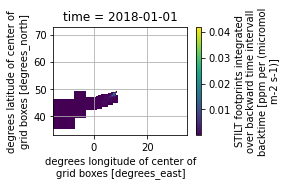

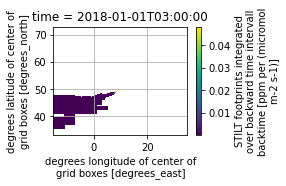

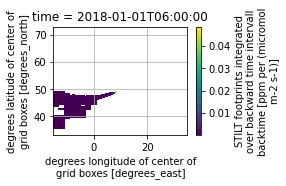

In [5]:
# just to see if it works, we create the first three images
for i in range(3):
    fp[i,:,:].plot(figsize=(3,2))
    plt.grid(True)
    plt.show()
    plt.close()

## Create the figures for all footprints

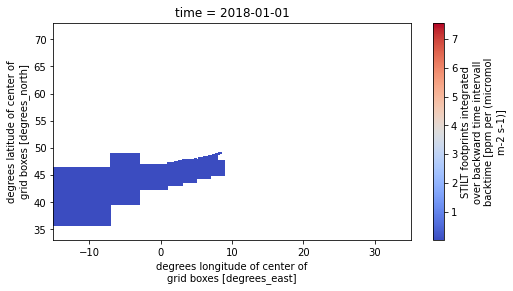

In [6]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(8,4))
# Plot the initial frame. 

cax = fp[0,:,:].plot(    
    add_colorbar=True,
    cmap='coolwarm',
    vmin=np.min(fp).values,
    vmax=np.max(fp).values,
    cbar_kwargs={'extend':'neither'}
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(fp[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(fp.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,                  # figure
    animate,              # name of the function above
    frames=len(fp),       # Could also be iterable or list
    interval=200          # ms between frames
)

## Display the animation

Note: Based on how many footprints you have `len(fp)` it can take a while to create the animation, and you may possibly run out of memory. <br>
For this example we have selected footprints for a month for all time slots (every 3h),<br> hence we need to **calculate 240 images**, which requires approximately **1 minute.....be patient**.

In [7]:
HTML(ani.to_jshtml())

## Example based on
https://climate-cms.org/2019/09/03/python-animation.html